In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plot_curve(xlabel, xs, curves, labels, colors, title, figsize=(8,6)):
    fig = plt.figure(figsize=figsize)
    for i, curve in enumerate(curves):
        mask = np.array([i for i, v in enumerate(curve) if v is not None])
        plt.plot(np.array(xs)[mask], np.array(curve)[mask], label=labels[i], color=colors[i], marker='o')
    plt.xticks(xs)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.title(title)
    plt.show()

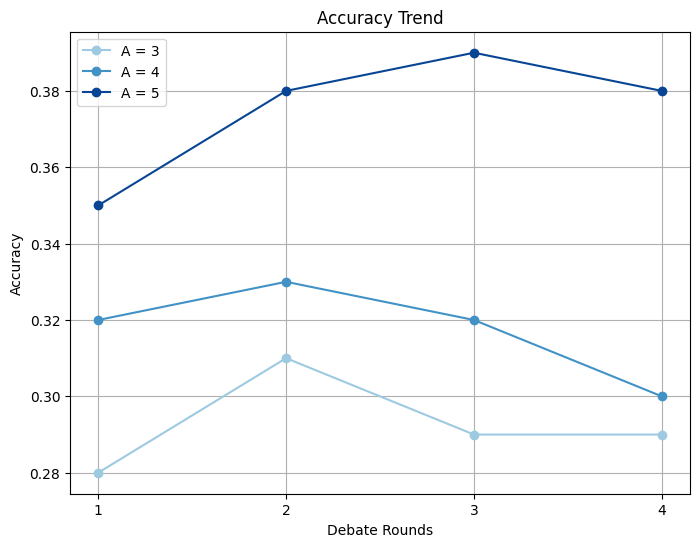

In [22]:
plot_curve(xlabel="Debate Rounds", xs=[1,2,3,4], 
           curves=[[0.28, 0.31, 0.29, 0.29],
                   [0.32, 0.33, 0.32, 0.30],
                   [0.35, 0.38, 0.39, 0.38]], 
           labels=["A = 3", "A = 4", "A = 5"], 
           title="Accuracy Trend",
           colors=["#9ecae1", "#4292c6", "#084594"])

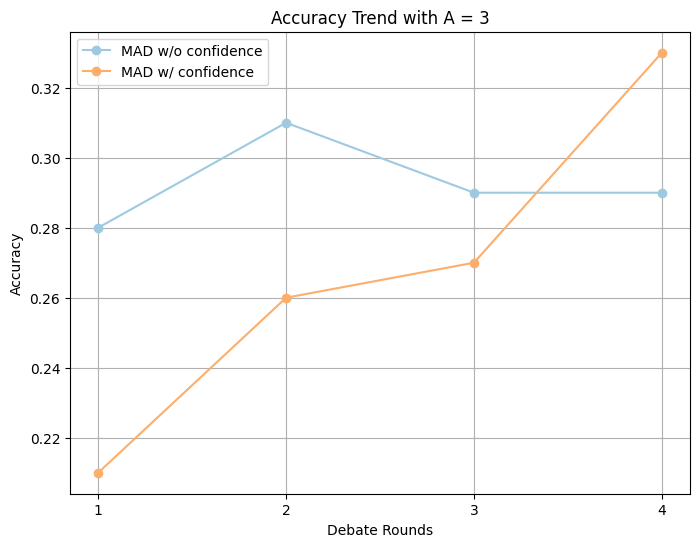

In [23]:
plot_curve(xlabel="Debate Rounds", xs=[1,2,3,4], 
           curves=[[0.28, 0.31, 0.29, 0.29],
                   [0.21, 0.26, 0.27, 0.33]], 
           labels=["MAD w/o confidence", "MAD w/ confidence"], 
           title="Accuracy Trend with A = 3",
           colors=["#9ecae1", "#fdae6b"])

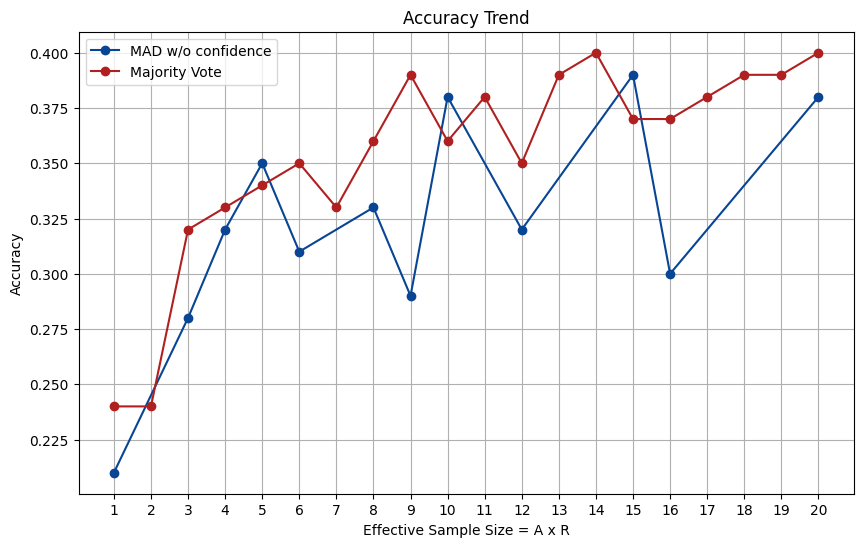

In [21]:
plot_curve(xlabel="Effective Sample Size = A x R", xs=list(range(1,21)), 
           curves=[[0.21, None, 0.28, 0.32, 0.35, 0.31, None, 0.33, 0.29, 0.38, None, 0.32, None, None, 0.39, 0.30, None, None, None, 0.38],
                   [0.24, 0.24, 0.32, 0.33, 0.34, 0.35, 0.33, 0.36, 0.39, 0.36, 0.38, 0.35, 0.39, 0.40, 0.37, 0.37, 0.38, 0.39, 0.39, 0.40]], 
           labels=["MAD w/o confidence", "Majority Vote"], 
           title="Accuracy Trend",
           colors=["#084594", "#b02020"], figsize=(10,6))

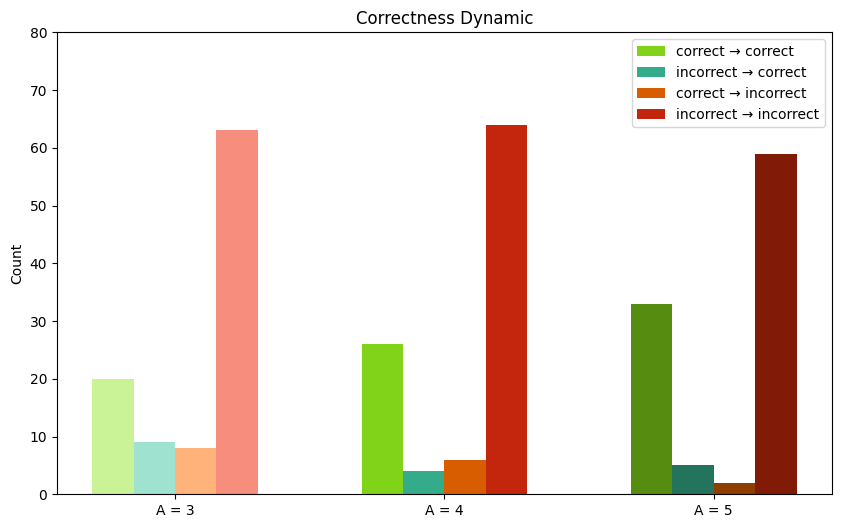

In [50]:
from matplotlib.patches import Patch

group_colors = [["#CAF297", "#9EE2CF", "#FFB37A", "#F78D7C"],
                ["#81D31A", "#34AC8B", "#D85C00", "#C3260C"],
                ["#568D11", "#23735D", "#903E00", "#821A08"]]

# group_colors = [["#8ED973", "#61CBF4", "#E59EDD", "#F2AA84"] for _ in range(3)]

data = np.array([
    [20, 9, 8, 63],   # A=3 values
    [26, 4, 6, 64],   # A=4 values
    [33, 5, 2, 59],   # A=5 values
])

n_groups = 3
n_bars_per_group = 4
bar_width = 0.08
group_gap = 0.2
group_width = n_bars_per_group * bar_width
group_starts = np.arange(n_groups) * (group_width + group_gap)

fig, ax = plt.subplots(figsize=(10, 6))
for g in range(n_groups):
    for i in range(n_bars_per_group):
        x_pos = group_starts[g] + i * bar_width
        color = group_colors[g][i]
        ax.bar(x_pos, data[g, i], width=bar_width, color=color)

xticks = group_starts + bar_width * 1.5
ax.set_xticks(xticks)
ax.set_xticklabels(["A = 3", "A = 4", "A = 5"])

ax.set_ylim(0, 80)
ax.set_ylabel("Count")
ax.set_title("Correctness Dynamic")

legend_elements = [
    Patch(facecolor=group_colors[1][0], label="correct → correct"),  # rename as needed
    Patch(facecolor=group_colors[1][1], label="incorrect → correct"),
    Patch(facecolor=group_colors[1][2], label="correct → incorrect"),
    Patch(facecolor=group_colors[1][3], label="incorrect → incorrect"),
]
ax.legend(handles=legend_elements, loc="best")